## EDA - Telco Churn

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
telco_df = pd.read_csv('../data/processed/telco_churn.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,0,74.40,306.6,1


## Churn rate

### General

In [57]:
counts = telco_df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
sizes = [counts[0], counts[1]]
sizes

[np.int64(5174), np.int64(1869)]

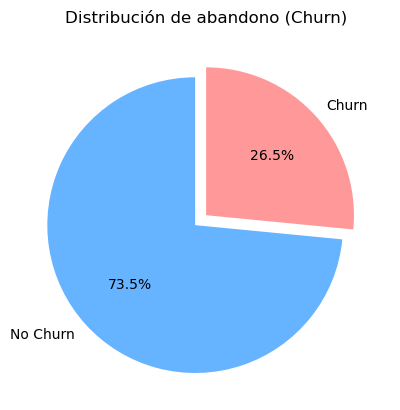

In [8]:
fig, ax = plt.subplots()
ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn)')
plt.show()

 - Churn Rate general del 26.5%, de más de 7000 clientes 1869 abandonan

### Por servicio

#### Phone Service

In [51]:
phone_df = pd.read_csv('../data/processed/phone_service.csv')
phone_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7469-LKBCI,1,0,0,0,16,1,0,2,0,1,18.95,326.8,0
1,8191-XWSZG,0,0,0,0,52,1,0,1,0,0,20.65,1022.95,0
2,1680-VDCWW,1,0,1,0,12,1,0,1,0,1,19.80,202.25,0
3,1066-JKSGK,1,0,0,0,1,1,0,0,0,0,20.15,20.15,1
4,7310-EGVHZ,1,0,0,0,1,1,0,0,0,1,20.20,20.2,0


In [46]:
p_counts = phone_df['Churn'].value_counts()
p_labels = labels
p_sizes = [p_counts[0], p_counts[1]]
p_sizes

[np.int64(1413), np.int64(113)]

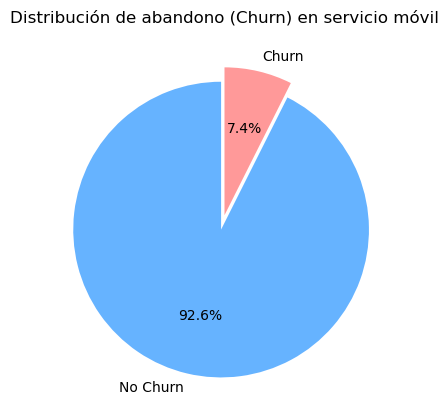

In [11]:
fig, ax = plt.subplots()
ax.pie(
    p_sizes, 
    labels=p_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio móvil')
plt.show()

  - El servicio móvil presenta un tasa de churn aislada que es baja. Ya que representa una pequeña parte del negocio no es un driver principal de churn

#### Internet Service

In [53]:
internet_df = pd.read_csv('../data/processed/internet_service.csv')
internet_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,7795-CFOCW,1,0,0,0,45,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
2,6713-OKOMC,0,0,0,0,10,1,1,0,0,0,0,0,0,0,0,29.75,301.9,0
3,8779-QRDMV,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
4,8665-UTDHZ,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,30.20,30.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4501-VCPFK,1,0,0,0,26,1,0,0,1,1,0,0,0,0,0,35.75,1022.5,0
678,2274-XUATA,1,1,1,0,72,1,1,1,1,1,1,1,2,1,1,63.10,4685.55,0
679,2235-DWLJU,0,1,0,0,6,1,0,0,0,0,1,1,0,1,0,44.40,263.05,0
680,7750-EYXWZ,0,0,0,0,12,1,0,1,1,1,1,1,1,0,0,60.65,743.3,0


In [13]:
i_counts = internet_df['Churn'].value_counts()
i_labels = labels
i_sizes = [i_counts[0], i_counts[1]]
i_sizes

[np.int64(512), np.int64(170)]

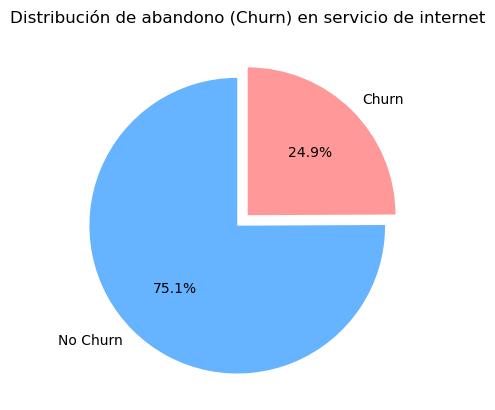

In [14]:
fig, ax = plt.subplots()
ax.pie(
    i_sizes, 
    labels=i_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio de internet')
plt.show()

- El servicio de internet concentra la mayor parte del riesgo estructural de churn.

#### Both Services

In [54]:
both_df = pd.read_csv('../data/processed/phone_internet_service.csv')
both_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
1,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
2,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
3,9305-CDSKC,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
4,1452-KIOVK,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,1,89.10,1949.4,0


In [58]:
b_counts = both_df['Churn'].value_counts()
b_labels = labels
b_sizes = [b_counts[0], b_counts[1]]
b_sizes

[np.int64(3249), np.int64(1586)]

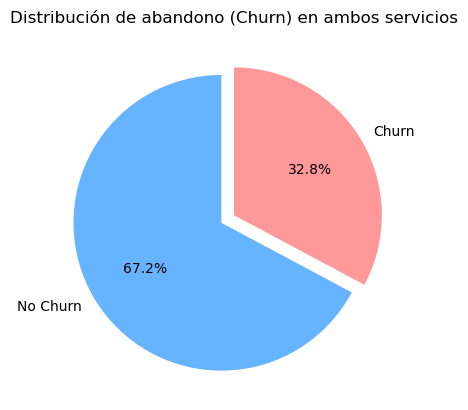

In [59]:
fig, ax = plt.subplots()
ax.pie(
    b_counts,
    labels = b_labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en ambos servicios')
plt.show()

- La contratación conjunta presenta una tasa de abandono superior a la media, lo que sugiere que el aumento de coste o complejidad del servicio puede estar incrementando el riesgo de salida.

### Senior Churn

In [60]:
senior_df = telco_df[telco_df['SeniorCitizen'] == 1]
senior_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
30,3841-NFECX,0,1,1,0,71,1,1,2,1,1,1,1,0,0,2,1,1,96.35,6766.95,0
31,4929-XIHVW,1,1,1,0,2,1,0,2,0,0,1,0,1,1,0,1,1,95.50,181.65,0
34,3413-BMNZE,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,45.25,45.25,0
50,8012-SOUDQ,0,1,0,0,43,1,1,2,0,1,0,0,1,0,0,1,0,90.25,3838.75,0


In [62]:
counts = senior_df['Churn'].value_counts()
labels = ['No churn', 'Churn']
sizes = [counts[0], counts[1]]
sizes


[np.int64(666), np.int64(476)]

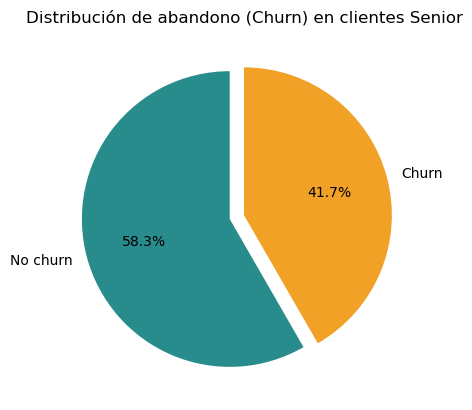

In [63]:
fig, ax = plt.subplots()
ax.pie(
    counts,
    labels = labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#298C8C','#F1A226'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en clientes Senior')
plt.show()

- El segmento senior presenta una tasa de churn significativamente superior al promedio global, lo que lo convierte en un grupo de alto riesgo que requiere análisis específico de sensibilidad al precio, complejidad del servicio o experiencia digital.

### Gender Churn

In [21]:
female_df = telco_df[telco_df['gender'] == 0]
male_df = telco_df[telco_df['gender'] == 1]

In [22]:
labels = ['No churn', 'Churn']
female_counts = female_df['Churn'].value_counts()
male_counts = male_df['Churn'].value_counts()

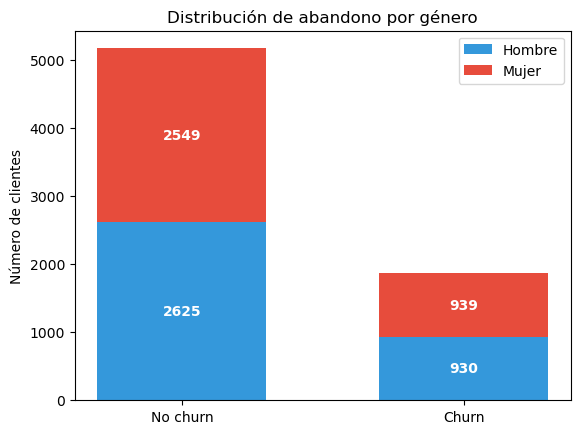

In [23]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    male_counts,
    width,
    label = 'Hombre', 
    color = '#3498db'
)
ax.bar(
    labels,
    female_counts, 
    width,
    bottom= male_counts,
    label = 'Mujer',
    color = '#e74c3c'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por género')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- El genero del cliente no es importante para la relación con el abandono

### ¿El churn es más alto en contratos mensuales que en anuales?

In [24]:
month_df = telco_df[telco_df['Contract'] == 0]
year_df = telco_df[(telco_df['Contract'] == 1) | (telco_df['Contract'] == 2)]

In [25]:
labels = ['Mensual', 'Anual']
month_counts = month_df['Churn'].value_counts()
year_counts = year_df['Churn'].value_counts()

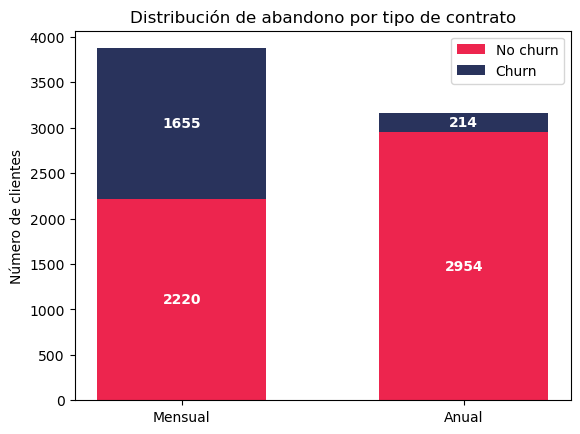

In [26]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [month_counts[0], year_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [month_counts[1], year_counts[1]], 
    width,
    bottom= [month_counts[0], year_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por tipo de contrato')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- El churn en contratos mensuales es aproximadamente 6 veces mayor que en contratos anuales, lo que confirma que la ausencia de permanencia es el principal driver estructural de abandono.

### ¿El churn es mayor en clientes con alta MonthlyCharges?

### Pago mensual

In [27]:
month_df['MonthlyCharges'].describe()

count    3875.000000
mean       66.398490
std        26.926599
min        18.750000
25%        45.850000
50%        73.250000
75%        88.875000
max       117.450000
Name: MonthlyCharges, dtype: float64

In [28]:
labels = [f'Bajo {round(month_df['MonthlyCharges'].mean(), 2)}', f'Sobre {round(month_df['MonthlyCharges'].mean(), 2)}']
less_counts = month_df[month_df['MonthlyCharges'] < month_df['MonthlyCharges'].mean()]['Churn'].value_counts()
over_counts = month_df[month_df['MonthlyCharges'] > month_df['MonthlyCharges'].mean()]['Churn'].value_counts()

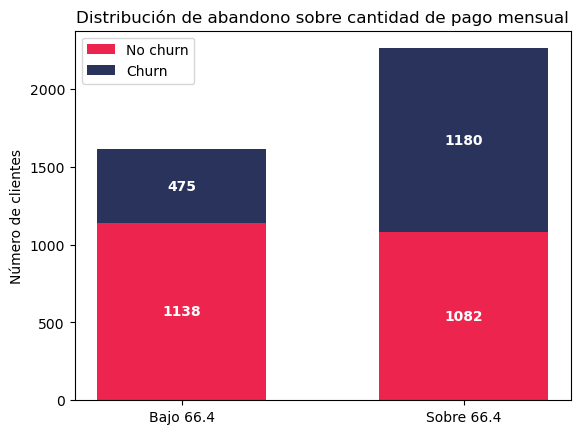

In [29]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [less_counts[0], over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [less_counts[1], over_counts[1]], 
    width,
    bottom= [less_counts[0], over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Clientes mensuales que pagan sobre la media tienden a abandonar más del 50%

### Pago anual

In [30]:
year_df['MonthlyCharges'].describe()

count    3168.000000
mean       62.759612
std        33.452114
min        18.250000
25%        24.550000
50%        65.600000
75%        92.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [31]:
labels = [f'Bajo {round(year_df['MonthlyCharges'].mean(), 2)}', f'Sobre {round(year_df['MonthlyCharges'].mean(), 2)}']
less_counts = year_df[year_df['MonthlyCharges'] < year_df['MonthlyCharges'].mean()]['Churn'].value_counts()
over_counts = year_df[year_df['MonthlyCharges'] > year_df['MonthlyCharges'].mean()]['Churn'].value_counts()

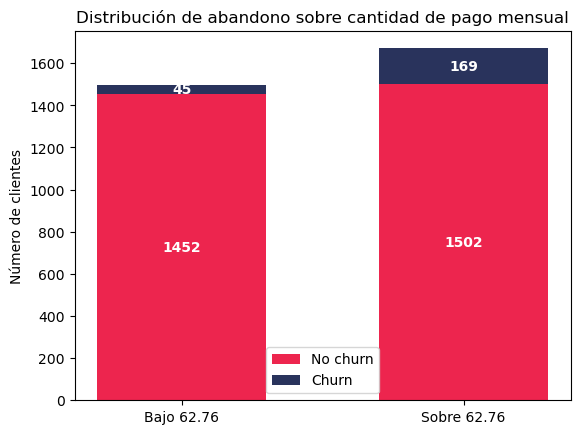

In [32]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [less_counts[0], over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [less_counts[1], over_counts[1]], 
    width,
    bottom= [less_counts[0], over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de pago mensual')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Clientes anuales que pagan encima de la media tienden a abandonar más pero no es preocupante

### ¿Tenure bajo = churn alto?

In [65]:
telco_df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [66]:
labels = ['Bajo 11', 'Sobre 11']
t_less_counts = telco_df[telco_df['tenure'] < 11]['Churn'].value_counts()
t_over_counts = telco_df[telco_df['tenure'] >= 11]['Churn'].value_counts()

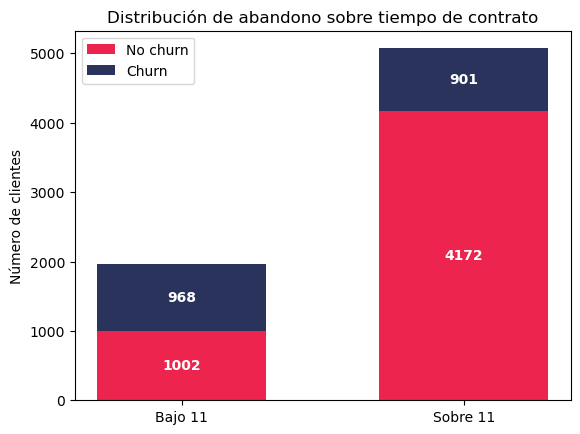

In [67]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [t_less_counts[0], t_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#ED254E'
)
ax.bar(
    labels,
    [t_less_counts[1], t_over_counts[1]], 
    width,
    bottom= [t_less_counts[0], t_over_counts[0]],
    label = 'Churn',
    color = '#29335C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre tiempo de contrato')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- La mayoría del churn ocurre en los primeros meses.

### ¿Como es la relación tenure - churn?


In [36]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [37]:
t_churn = telco_df.groupby(['tenure'])['Churn'].sum().to_frame().reset_index()
t_count = telco_df.groupby(['tenure'])['customerID'].count().to_frame().reset_index()

t = pd.merge(t_churn, t_count, on='tenure')

t.columns = ['tenure', 'churn_sum', 'customer_count']

t.head()

,tenure,churn_sum,customer_count
0,0,0,11
1,1,380,613
2,2,123,238
3,3,94,200
4,4,83,176


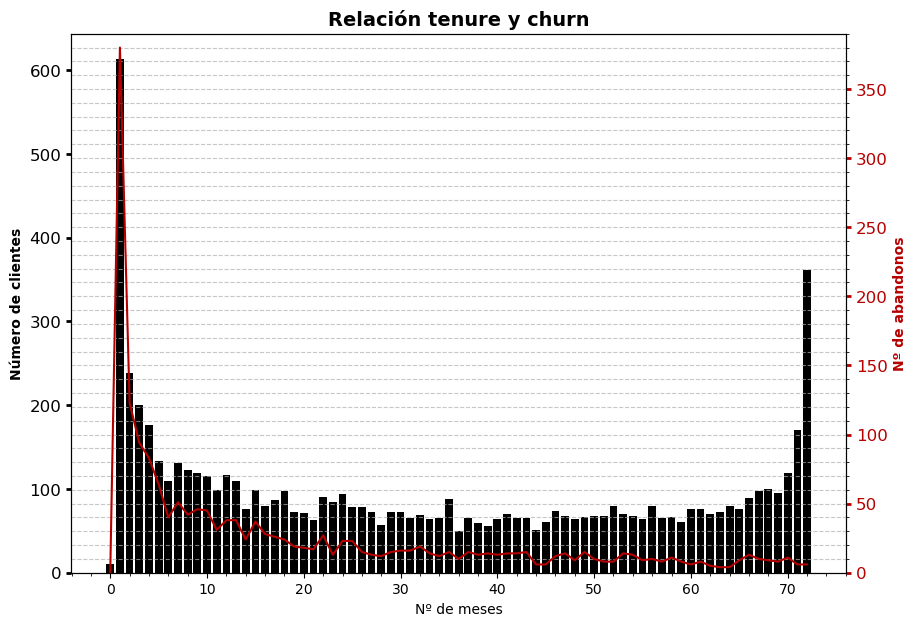

In [38]:
fig, ax = plt.subplots(figsize= (10,7))

ax.bar(
    t['tenure'],
    t['customer_count'],
    color = 'k'
)
ax.set_ylabel('Número de clientes', weight = 'bold')
ax.set_xlabel('Nº de meses')
ax.tick_params(axis = 'y', width = 2, labelsize = 'large')
ax.set_title('Relación tenure y churn', fontsize = 14, weight = 'bold')
ax1 = ax.twinx()
ax1.set_ylim(0, t['churn_sum'].max() +10)
ax1.plot(
    t['tenure'],
    t['churn_sum'],
    color = '#b60000',
)
ax1.set_ylabel('Nº de abandonos', weight = 'bold', color = '#b60000')
ax1.tick_params(axis = 'y', width = 2, labelsize = 'large', colors = '#b60000')
ax1.minorticks_on()
ax1.grid(which= 'major', axis='y', linestyle='--', alpha = 0.7)
ax1.grid(which = 'minor', axis='y', linestyle='--', alpha = 0.7)
plt.show()


- El primer més es crítico ya que el 15% del churn ocurre en este més.

### ¿Autopay reduce churn?

In [39]:
labels = ['Pago automático', 'Pago manual']
p_less_counts = telco_df[telco_df['PaymentMethod'] == 1]['Churn'].value_counts()
p_over_counts = telco_df[telco_df['PaymentMethod'] == 0]['Churn'].value_counts()

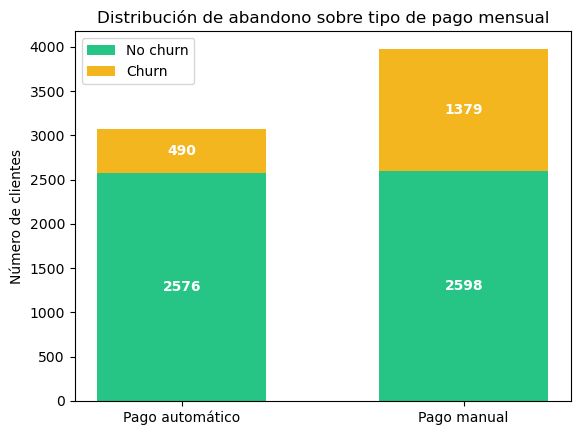

In [ ]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [p_less_counts[0], p_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#26C485'
)
ax.bar(
    labels,
    [p_less_counts[1], p_over_counts[1]], 
    width,
    bottom= [p_less_counts[0], p_over_counts[0]],
    label = 'Churn',
    color = '#F3B61F'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre tipo de pago')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Automatizar pagos reduce fricción y reduce churn

### ¿Clientes con más servicios adicionales churnean menos?

In [41]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [42]:
services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',	'TechSupport', 	'StreamingTV',	'StreamingMovies']

In [43]:
services_df = telco_df[telco_df[services].sum(axis=1) >= 4]
services_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
8,7892-POOKP,0,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
12,8091-TTVAX,1,0,1,0,58,1,1,2,0,0,1,0,1,1,1,0,1,100.35,5681.1,0
13,0280-XJGEX,1,0,0,0,49,1,1,2,0,1,1,0,1,1,0,1,1,103.70,5036.3,1
14,5129-JLPIS,1,0,0,0,25,1,0,2,1,0,1,1,1,1,0,1,0,105.50,2686.05,0


In [44]:
labels = ['Menos de 4 servicios', '4 servicios o más']
s_less_counts = telco_df[telco_df[services].sum(axis=1) < 4]['Churn'].value_counts()
s_over_counts = telco_df[telco_df[services].sum(axis=1) >= 4]['Churn'].value_counts()

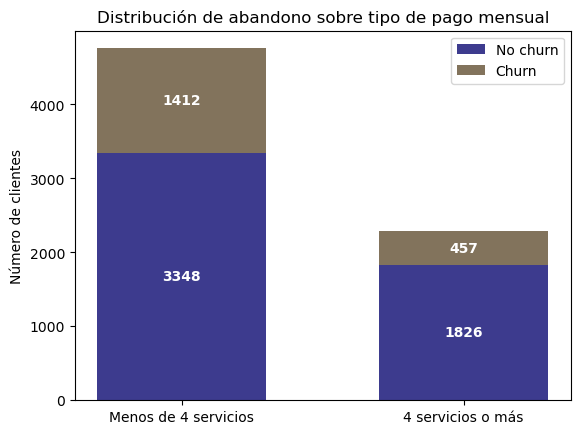

In [ ]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    [s_less_counts[0], s_over_counts[0]],
    width,
    label = 'No churn', 
    color = '#3D3B8E'
)
ax.bar(
    labels,
    [s_less_counts[1], s_over_counts[1]], 
    width,
    bottom= [s_less_counts[0], s_over_counts[0]],
    label = 'Churn',
    color = '#82735C'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono sobre cantidad de servicios contratados')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()

- Cuantos más servicios tiene contratado un cliente acaba generando más dependencia haciendo que haya menos abandonos

### Contract type + Monthly charges

#### Mensual + Monthly Charge Alto

In [ ]:
labels = [f'Bajo {round(year_df['MonthlyCharges'].mean(), 2)}', f'Sobre {round(year_df['MonthlyCharges'].mean(), 2)}']
less_counts = year_df[year_df['MonthlyCharges'] < year_df['MonthlyCharges'].mean()]['Churn'].value_counts()
over_counts = year_df[year_df['MonthlyCharges'] > year_df['MonthlyCharges'].mean()]['Churn'].value_counts()

In [86]:
labels = ['Churn', 'No churn']
m = month_df[month_df['MonthlyCharges'] > month_df['MonthlyCharges'].mean()]
m_counts = m['Churn'].value_counts()
porcentaje = [f'{v/m['Churn'].count()*100:.1f}%' for v in m_counts]
m_counts

Churn
1    1180
0    1082
Name: count, dtype: int64

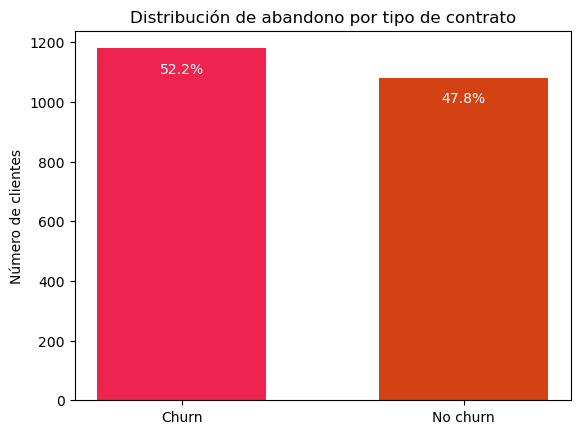

In [91]:
fig, ax = plt.subplots()
width = 0.6
barras = ax.bar(
    labels,
    m_counts,
    width,
    color = ['#ED254E','#d34212']
)
ax.bar_label(barras, labels=porcentaje, padding=-20, color = 'w')
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por tipo de contrato')
plt.show()